In [1]:
import os
import numpy as np

In [2]:
# from hw2

# Vectorize Read in TFIDF File's text
def Vectorize( string ):
    '''
    this function is for read in pre-calculated normalized tf-idf vector
    '''
    return [( int(t[0]), float(t[1]) ) for t in [ v.split() for v in string.split('\n')[2:] ] ]


# Calculate cosine between 2 vectors in O(n)
def Cosine( vec1, vec2 ):
    '''
    this function is for calculating cosine-similarity between 2 vector
    '''
    cosine = 0.0
    length = len(vec1) if len(vec1) <= len(vec2) else len(vec2)
    
    i1 = 0
    i2 = 0
    while i1 < length and i2 < length:
        
        if vec1[i1][0] == vec2[i2][0]:
            cosine += vec1[i1][1] * vec2[i2][1]
            i1 += 1
            i2 += 1
            
        elif vec1[i1][0] > vec2[i2][0]:
            i2 += 1
            
        else:
            i1 += 1
            
    return cosine

In [4]:
# O(n^2): calculate pairwise cosine similarity

N = len(os.listdir('./IRTMhw2tfidfVec/'))

print('total number of documents is: ', N)

print('reading pre-calculate tfidf vectors...')

vector_matrix = []
cosine_matrix = np.array( [[0.] * N] * N )


for i in range(1, 1096):
    with open('./IRTMhw2tfidfVec/' + str(i) + '.txt', 'r') as f:
        vect1 = Vectorize(f.read())
        f.close()
    vector_matrix.append( vect1 )
    
vector_matrix = np.array( vector_matrix )

print('calculating pairwise similarities...')

for i in range(1, 1096):
    
    for j in range(1, 1096):
        
        cosine_matrix[i - 1][j - 1] = Cosine( vector_matrix[i - 1], vector_matrix[j - 1] )
        
# save RAM space
cosine_matrix = np.array( cosine_matrix )
        
print('sucessfully built cosine similarity matrix')

total number of documents is:  1095
reading pre-calculate tfidf vectors...
calculating pairwise similarities...
sucessfully built cosine similarity matrix


In [5]:
cos_mat = cosine_matrix - np.identity(N)
cos_mat[ np.unravel_index( np.argmax( cos_mat ) , cos_mat.shape ) ]

1.0000000000000007

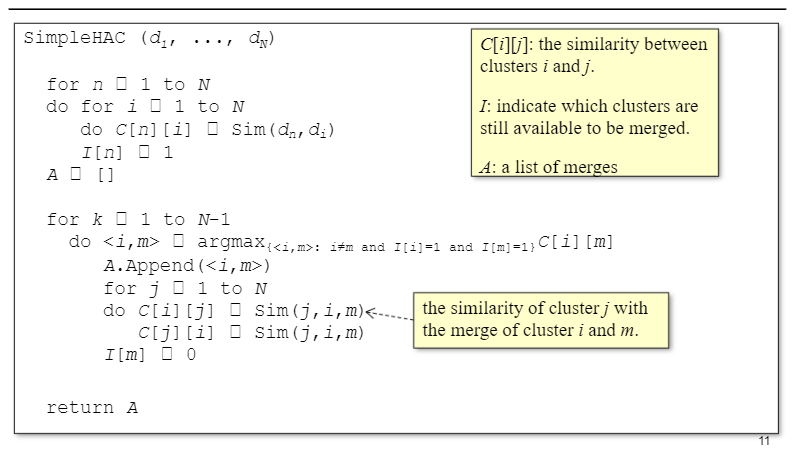

In [41]:
Cosine(vector_matrix[1], vector_matrix[2])

0.03429726947598737

In [39]:
def BuildCosineMatrix( Vectors ):
    
    C = np.array( [[0.] * N] * N )
    
    for i in range(len(Vectors)):
    
        for j in range(len(Vectors)):
        
            C[i][j] = Cosine( Vectors[i], Vectors[j] )
        
    # save RAM space
    C = np.array( C )
    
    return C - np.identity( len(Vectors) )


def Sim( j, i, m ):
    
    sim = []
    
    for vec in j:
        sim.append( Cosine(vec, i) )
        sim.append( Cosine(vec, m) )
        
    return np.max( np.array( sim ) )
    
    
def SimpleHAC( Vectors ):
    
    # initialize
    
    print('initializing...')
    
    V = Vectors
    print(V)
    C = BuildCosineMatrix( Vectors )
    N = len( C )
    A = []
    I = [ 1 ] * N
    
    print('successfully initialized, now start training...')
    
    
    
    for k in range( N - 1 ):
        
        print(k, 'th, iteratons...')
        
        argmaxes = C.flatten().argsort()
        buttom = 0
        
        print(argmaxes[-1])
        
        while buttom == 0:
            
            i, m = np.unravel_index( argmaxes[-1] , C.shape )
            
            if I[i] == 1 and I[m] == 1:
                
                buttom = 1
        
            else:
                
                argmaxes.pop()
                
        A.append( (i, m) )
        
        for j in range( N ):
            
            C[i][j] = Sim( V[j], V[i], V[m] )
            C[j][i] = Sim( V[j], V[i], V[m] )
            
        I[m] = 0
                
    print('done!')
    
    return A

In [40]:
AM = SimpleHAC( vector_matrix )

initializing...
[list([(66, 0.06218456522882724), (201, 0.04755538725119509), (333, 0.023723387086798435), (841, 0.09049414099872469), (935, 0.05656061244933565), (952, 0.17829145087291146), (1006, 0.06335955552075605), (1083, 0.1602188361124871), (1488, 0.03152029971375401), (1594, 0.05351496856346571), (1702, 0.05791569827013085), (1856, 0.08243690241816726), (1925, 0.04193965570550536), (1953, 0.10176082129204501), (2028, 0.11427222569066627), (2030, 0.06876140148562832), (2133, 0.095206876370309), (2834, 0.11287935265829238), (2940, 0.12445466551625273), (3102, 0.08927913915970008), (3224, 0.07731005131139009), (3281, 0.03715313317943021), (3283, 0.0930912246266835), (3372, 0.08811374330045431), (3435, 0.0719750322946874), (3501, 0.08197269326043613), (3947, 0.05310292151483266), (4082, 0.09448409765905737), (4208, 0.07713672616610331), (4243, 0.11287935265829238), (4244, 0.038627552092848905), (4267, 0.05368540628868821), (4454, 0.07469596962744848), (4555, 0.05637217457586255), (

KeyboardInterrupt: 

In [33]:
arr = np.array([[1, 3], [2, 4]])
arr.argsort()

array([[0, 1],
       [0, 1]], dtype=int64)

In [71]:
I = np.array( [1] * N )

In [ ]:
for k in range(N):
    max

In [ ]:
class Node():
    
    def __init__( self, vector, cls ):
        
        self.vector = vector
        self.cls    = cls

In [65]:
?np.argmax